# MLP AGENT visualization

## 1. Setup and Imports

In [1]:
import os, sys

try:
    base_path = os.path.dirname(__file__)
except NameError:
    # Si __file__ n’existe pas (ex: notebook), on prend le cwd
    base_path = os.getcwd()

# Ajouter le dossier parent
sys.path.append(os.path.abspath(os.path.join(base_path, '..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Import the environment and agents
from permuted_mnist.env.permuted_mnist import PermutedMNISTEnv
from models.MLP.agent_James_Bond import Agent as James_Bond_Agent
from models.MLP.agent_mario import Agent as Mario_Agent

# Import the visualization function
from utils.visualization import Comparison_plots

print("✓ Imports successful")

✓ Imports successful


We fix the seed for reproducibility:

In [3]:
seed = 42

We fix the number of CPUs:

In [4]:
n_jobs = 2

## 2. Create the Environment

Let's create an environment with 10 different permuted tasks:

In [5]:
# Create environment with 10 episodes (tasks)
env = PermutedMNISTEnv(number_episodes=10)

# Set seed for reproducibility
env.set_seed(seed)

print(f"Environment created with {env.number_episodes} permuted tasks")
print(f"Training set size: {env.train_size} samples")
print(f"Test set size: {env.test_size} samples")

Environment created with 10 permuted tasks
Training set size: 60000 samples
Test set size: 10000 samples


## 3. Understanding the Task Structure

Let's examine what a single task looks like:

In [6]:
# Get the first task
task = env.get_next_task()

print("Task structure:")
print(f"- X_train shape: {task['X_train'].shape}")
print(f"- y_train shape: {task['y_train'].shape}")
print(f"- X_test shape: {task['X_test'].shape}")
print(f"- y_test shape: {task['y_test'].shape}")
print(f"\nLabel distribution in training set:")
unique, counts = np.unique(task['y_train'], return_counts=True)
for label, count in zip(unique, counts):
    print(f"  Label {label}: {count} samples")

Task structure:
- X_train shape: (60000, 28, 28)
- y_train shape: (60000, 1)
- X_test shape: (10000, 28, 28)
- y_test shape: (10000,)

Label distribution in training set:
  Label 0: 6131 samples
  Label 1: 6742 samples
  Label 2: 5421 samples
  Label 3: 5851 samples
  Label 4: 6265 samples
  Label 5: 5958 samples
  Label 6: 5949 samples
  Label 7: 5842 samples
  Label 8: 5923 samples
  Label 9: 5918 samples


## 4. Visualize Permuted Images

Let's see how the permutation affects the images:

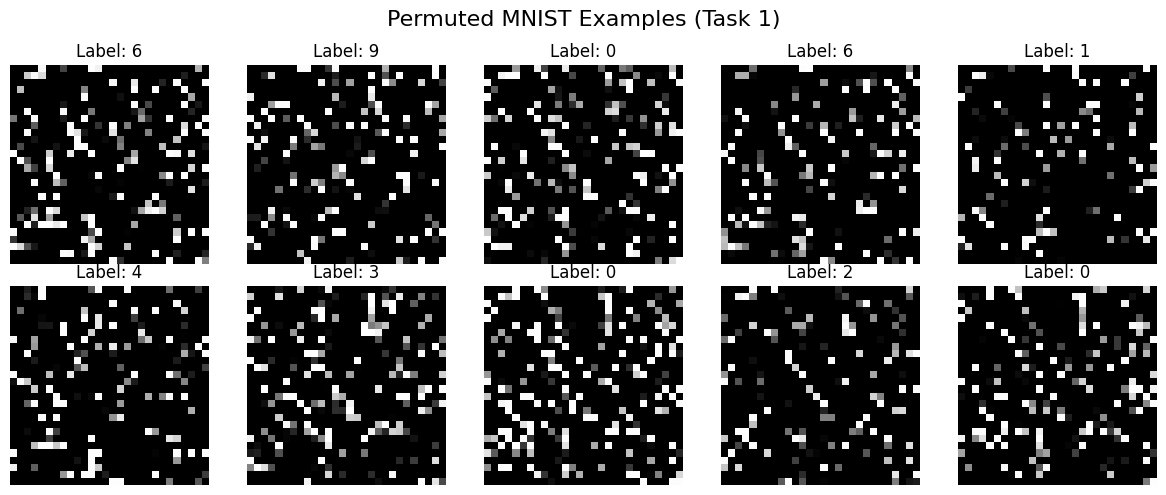

Note: The images look scrambled due to pixel permutation!
The labels are also permuted (not the original MNIST labels).


In [7]:
# Display some examples from the permuted task
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Permuted MNIST Examples (Task 1)', fontsize=16)

for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(task['X_train'][i], cmap='gray')
    ax.set_title(f'Label: {task["y_train"][i][0]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("Note: The images look scrambled due to pixel permutation!")
print("The labels are also permuted (not the original MNIST labels).")

## 5. MLP comparison :

## MLP :

In [8]:
def MLP(Agent):
    # Reset environment for fresh start
    env.reset()
    env.set_seed(seed)

    # Create MLP agent
    mlp_agent = Agent()

    # Track performance
    mlp_accuracies = []
    mlp_times = []

    print(f"Evaluating Agent:")

    # Evaluate on all tasks
    task_num = 1
    while True:
        task = env.get_next_task()
        if task is None:
            break
        if task_num >= 4: # limite for quick test
            break
            
        # Reset agent for new task
        mlp_agent.reset()
    
        start_time = time.time()
    
        # Train
        mlp_agent.train(task['X_train'], task['y_train'])
    
        # Make predictions
        predictions = mlp_agent.predict(task['X_test'])
    
        # Calculate time and accuracy
        elapsed_time = time.time() - start_time
        accuracy = env.evaluate(predictions, task['y_test'])
    
        mlp_accuracies.append(accuracy)
        mlp_times.append(elapsed_time)
    
        print(f"Task {task_num}: Accuracy = {accuracy:.2%}, Time = {elapsed_time:.4f}s")
        task_num += 1

    mean_accuracy = np.mean(mlp_accuracies)
    std_accuracy = np.std(mlp_accuracies)
    total_time = np.sum(mlp_times)

    print(f"\nMLP Agent Summary:")
    print(f"  Mean accuracy: {mean_accuracy:.2%} ± {std_accuracy:.2%}")
    print(f"  Total time: {total_time:.2f}s")

    return mean_accuracy, mlp_accuracies, mlp_times

In [9]:
mean_accuracy, accuracies_Bond, times_Bond = MLP(James_Bond_Agent)

Evaluating Agent:
Task 1: Accuracy = 98.38%, Time = 61.4218s
Task 2: Accuracy = 98.51%, Time = 59.1568s
Task 3: Accuracy = 98.47%, Time = 56.2652s

MLP Agent Summary:
  Mean accuracy: 98.45% ± 0.05%
  Total time: 176.84s


In [10]:
mean_accuracy, accuracies_Mario, times_Mario = MLP(Mario_Agent)

Evaluating Agent:
Task 1: Accuracy = 98.46%, Time = 59.2524s
Task 2: Accuracy = 98.29%, Time = 59.3067s
Task 3: Accuracy = 98.27%, Time = 59.2874s

MLP Agent Summary:
  Mean accuracy: 98.34% ± 0.09%
  Total time: 177.85s


### MLP Visualization :

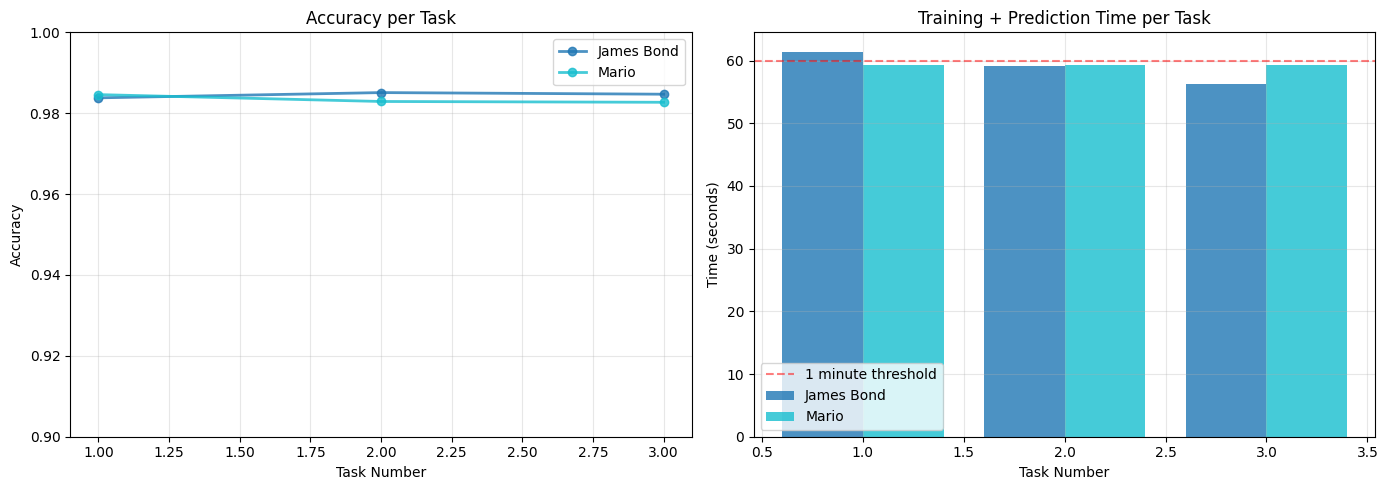

In [11]:
List = [
    [accuracies_Bond, times_Bond, "James Bond"],
    [accuracies_Mario, times_Mario, "Mario"]
]

Comparison_plots(*List)